In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
# Path to the weather dataset in your Colab drive
data_dir = 'dataset/'

In [5]:
img_height,img_width=180,180
batch_size=16
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1530 files belonging to 6 classes.
Using 1224 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1530 files belonging to 6 classes.
Using 306 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['alien_test', 'cloudy', 'foggy', 'rainy', 'shine', 'sunrise']


In [8]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


C:\Users\keshav\anaconda3\envs\py310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


77/77 [==============================] - 24s 134ms/step - loss: 1.3265 - accuracy: 0.5221 - val_loss: 1.0650 - val_accuracy: 0.6405
Epoch 2/10
77/77 [==============================] - 9s 111ms/step - loss: 0.8767 - accuracy: 0.6773 - val_loss: 0.9176 - val_accuracy: 0.6569
Epoch 3/10
77/77 [==============================] - 9s 111ms/step - loss: 0.7158 - accuracy: 0.7475 - val_loss: 0.8440 - val_accuracy: 0.6863
Epoch 4/10
77/77 [==============================] - 9s 111ms/step - loss: 0.6401 - accuracy: 0.7761 - val_loss: 0.7778 - val_accuracy: 0.7190
Epoch 5/10
77/77 [==============================] - 9s 110ms/step - loss: 0.4953 - accuracy: 0.8456 - val_loss: 0.6661 - val_accuracy: 0.7680
Epoch 6/10
77/77 [==============================] - 9s 111ms/step - loss: 0.4824 - accuracy: 0.8366 - val_loss: 0.6733 - val_accuracy: 0.7908
Epoch 7/10
77/77 [==============================] - 9s 112ms/step - loss: 0.3067 - accuracy: 0.8897 - val_loss: 0.6539 - val_accuracy: 0.8007
Epoch 8/10
77/77

In [69]:
 #Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_acc')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


In [55]:
model.evaluate(val_ds)

20/20 [==============================] - 1s 43ms/step - loss: 0.8804 - accuracy: 0.7614


[0.8804000020027161, 0.7614378929138184]

In [64]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.applications.mobilenet_v2 import MobileNetV2

# create the base pre-trained model
base_model = MobileNetV2(input_shape=(180,180, 3), include_top=False, weights='imagenet')

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][0]']         

In [67]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


C:\Users\keshav\anaconda3\envs\py310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


77/77 [==============================] - 19s 179ms/step - loss: 0.9859 - accuracy: 0.6650 - val_loss: 0.8334 - val_accuracy: 0.7255
Epoch 2/10
77/77 [==============================] - 12s 157ms/step - loss: 0.5905 - accuracy: 0.8031 - val_loss: 0.9673 - val_accuracy: 0.6895
Epoch 3/10
77/77 [==============================] - 12s 157ms/step - loss: 0.4717 - accuracy: 0.8350 - val_loss: 0.7633 - val_accuracy: 0.7745
Epoch 4/10
77/77 [==============================] - 12s 156ms/step - loss: 0.3682 - accuracy: 0.8709 - val_loss: 1.0123 - val_accuracy: 0.6895
Epoch 5/10
77/77 [==============================] - 12s 156ms/step - loss: 0.2909 - accuracy: 0.8938 - val_loss: 0.8686 - val_accuracy: 0.7124
Epoch 6/10
77/77 [==============================] - 12s 156ms/step - loss: 0.2466 - accuracy: 0.9101 - val_loss: 0.8225 - val_accuracy: 0.7451
Epoch 7/10
77/77 [==============================] - 12s 155ms/step - loss: 0.2488 - accuracy: 0.9134 - val_loss: 0.9151 - val_accuracy: 0.7222
Epoch 8/10

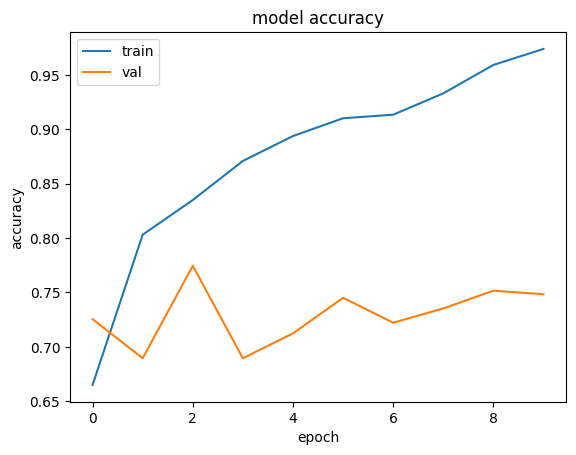

In [77]:
import keras
from matplotlib import pyplot as plt
%matplotlib inline
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [78]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.applications.vgg19 import VGG19

# create the base pre-trained model
base_model = VGG19(input_shape=(180,180, 3), include_top=False, weights='imagenet')

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model_vgg = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

#model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
model_vgg.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
epochs = 10
history = model_vgg.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
77/77 [==============================] - 15s 141ms/step - loss: 1.4007 - accuracy: 0.7770 - val_loss: 1.2165 - val_accuracy: 0.8170
Epoch 2/10
77/77 [==============================] - 8s 103ms/step - loss: 0.2612 - accuracy: 0.9297 - val_loss: 0.8831 - val_accuracy: 0.8562
Epoch 3/10
77/77 [==============================] - 8s 102ms/step - loss: 0.0947 - accuracy: 0.9796 - val_loss: 1.0416 - val_accuracy: 0.8627
Epoch 4/10
77/77 [==============================] - 8s 102ms/step - loss: 0.0464 - accuracy: 0.9877 - val_loss: 0.9054 - val_accuracy: 0.8562
Epoch 5/10
77/77 [==============================] - 8s 102ms/step - loss: 0.0714 - accuracy: 0.9837 - val_loss: 1.2796 - val_accuracy: 0.8301
Epoch 6/10
77/77 [==============================] - 8s 102ms/step - loss: 0.0494 - accuracy: 0.9861 - val_loss: 1.1249 - val_accuracy: 0.8660
Epoch 7/10
77/77 [==============================] - 8s 102ms/step - loss: 0.0321 - accuracy: 0.9926 - val_loss: 1.0652 - val_accuracy: 0.8791
Epoch

In [87]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model_res = ResNet50(input_shape=(180,180, 3), include_top=False,weights='imagenet')

# add a global spatial average pooling layer
x = model_res.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model_re = Model(inputs=model_res.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in model_res.layers:
    layer.trainable = False

model_re.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#model_vgg.summary()

In [88]:
history = model_re.fit(
       train_ds,
       validation_data=val_ds,
       epochs=10
)

Epoch 1/10
77/77 [==============================] - 12s 91ms/step - loss: 0.8408 - accuracy: 0.8056 - val_loss: 0.3970 - val_accuracy: 0.9183
Epoch 2/10
77/77 [==============================] - 5s 68ms/step - loss: 0.1844 - accuracy: 0.9477 - val_loss: 0.3826 - val_accuracy: 0.9216
Epoch 3/10
77/77 [==============================] - 5s 68ms/step - loss: 0.1077 - accuracy: 0.9681 - val_loss: 0.4363 - val_accuracy: 0.8922
Epoch 4/10
77/77 [==============================] - 5s 68ms/step - loss: 0.0609 - accuracy: 0.9771 - val_loss: 0.4549 - val_accuracy: 0.9314
Epoch 5/10
77/77 [==============================] - 5s 68ms/step - loss: 0.0480 - accuracy: 0.9845 - val_loss: 0.4485 - val_accuracy: 0.9150
Epoch 6/10
77/77 [==============================] - 6s 71ms/step - loss: 0.0125 - accuracy: 0.9975 - val_loss: 0.5096 - val_accuracy: 0.9183
Epoch 7/10
77/77 [==============================] - 6s 71ms/step - loss: 0.0077 - accuracy: 0.9992 - val_loss: 0.5023 - val_accuracy: 0.9085
Epoch 8/10
7

Category: alien_test, Number of images: 30
Category: cloudy, Number of images: 300
Category: foggy, Number of images: 300
Category: rainy, Number of images: 300
Category: shine, Number of images: 250
Category: sunrise, Number of images: 350


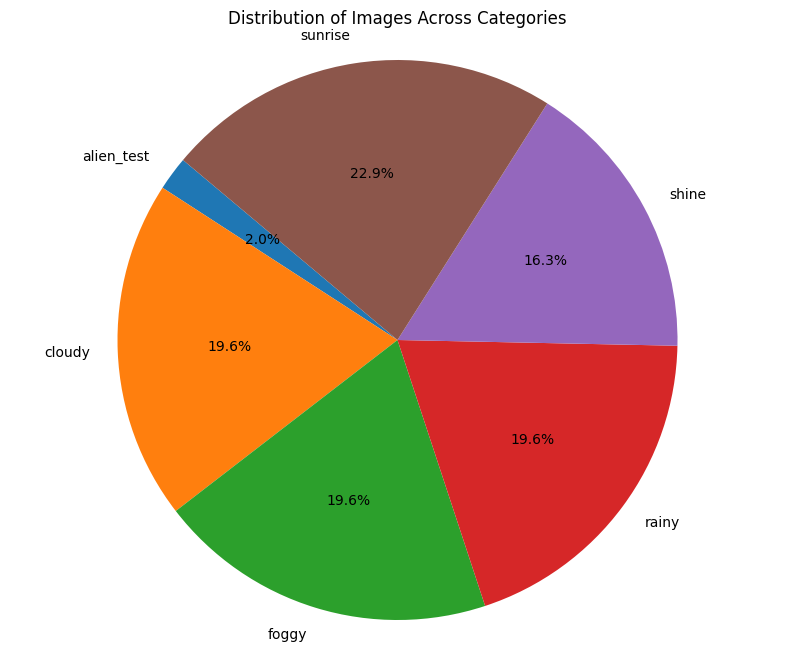

<Figure size 640x480 with 0 Axes>

In [90]:

import os
import matplotlib.pyplot as plt

# Define the path to the dataset folder
dataset_path = 'dataset'

# Initialize a dictionary to hold the counts of images per category
image_counts = {}

# Iterate through each category folder
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        # Count the number of image files in the category folder
        image_counts[category] = len([file for file in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, file))])

# Print the counts for each category
for category, count in image_counts.items():
    print(f'Category: {category}, Number of images: {count}')

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(image_counts.values(), labels=image_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images Across Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
plt.savefig("1.png")

In [100]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((180,180)))
    x.flatten
    x = x.reshape(1,180,180,3)
    r = model_re.predict_on_batch(x)
    classification = np.where(r == np.amax(r))[1][0]
    imshow(img)
    print(str(r[0][classification]*100) + '% Confidence ' + names(classification))

In [101]:
def names(num):
    return l[num]
l=['cloudy','foggy','rainy','shine','sunrise']

68.02801489830017% Confidence sunrise


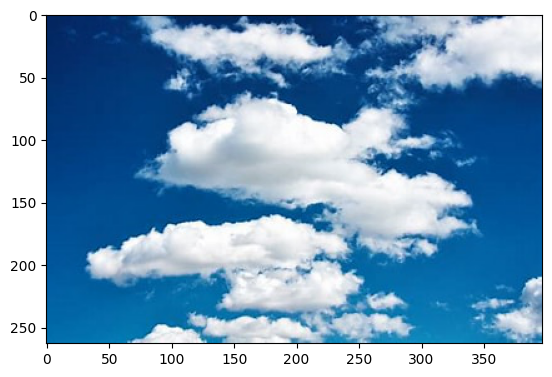

In [102]:
img = Image.open(r"1.jpg").convert('RGB')
Prediction(img)